In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install perfplot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
treasure_hunt=pd.read_excel('/content/TreasureHuntDataset.xlsx')

In [ ]:
treasure_hunt.rename(columns= {'Register Number':'Registration Number','We made _______ during the event':'Communication',"On a scale of 1 to 5, How much did you like the event?":'Rate event',"Did you find the Clues Difficult?":'Difficulty level','Did you find the First Round (Quiz) Easy?':'First round(rate)','Enter your Team Mates Register Numbers (Separated by Commas)':'Team mates(registration no.)','How many team mates did you know before?':'Known Team mates','How many of you were in the Team?':'No. of Team mates','How many team mates spoke the same language as yours?':'No. of team mates speaking same language as yours','Count of Team Mates from 1 BSc EA':'1BSc EA(no. of team mates)','Count of Team Mates from 1 BSc DS':'1BSc DS(no. of team mates)','Count of Team Mates from 3 BSc EA':'3BSc EA(no. of team mates)','Count of Team Mates from 3 BSc DS':'3BSc DS(no. of team mates)','Count of Team Mates from 5 BSc EA':'5BSc EA(no. of team mates)','Count of Team Mates from 5 BSc DS':'5BSc DS(no. of team mates)','Count of Team Mates from MSc':'MSc (no. of team mates)'},inplace=True)

In [ ]:
treasure_hunt.drop(['Timestamp','Team mates(registration no.)'], axis=1,inplace=True)

In [ ]:
treasure_hunt['Name'] = treasure_hunt['Name'].str.casefold()


In [ ]:
treasure_hunt.drop_duplicates(subset='Name',keep='last', inplace=True)


In [ ]:
for i in treasure_hunt.index:
  if treasure_hunt['Final Position'][i]=='Volunteer':
    treasure_hunt.drop(i,inplace=True)


In [ ]:
treasure_hunt.reset_index(inplace = True)

In [ ]:
treasure_hunt

,index,Name,Class,Registration Number,Gender,Communication,Final Position,Rate event,Difficulty level,First round(rate),Known Team mates,No. of Team mates,No. of team mates speaking same language as yours,1BSc EA(no. of team mates),1BSc DS(no. of team mates),3BSc EA(no. of team mates),3BSc DS(no. of team mates),5BSc EA(no. of team mates),5BSc DS(no. of team mates),MSc (no. of team mates)
0,1,rahul gnanapandithan,3 BSc EA,21112322,Male,"Phone Calls, Text Message, WhatsApp Group, Ver...",Out after Prelims,3,3,3,volunteers,1.0,volunteers,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3,sudiksha,3 BSc EA,21112342,Female,Verbal Communication,Out after Prelims,4,2,2,2,5.0,5,2.0,0.0,3.0,0.0,0.0,0.0,0.0
2,5,shubham chouhan,3 BSc EA,21112355,Male,"Phone Calls, WhatsApp Group",Out after Prelims,2,1,3,2,5.0,5,1.0,1.0,3.0,0.0,0.0,0.0,0.0
3,7,heli dalal,3 BSc EA,21112312,Female,Verbal Communication,Out after Prelims,3,1,3,4,5.0,Everyone spoke the same language,0.0,0.0,2.0,0.0,0.0,0.0,2.0
4,8,tanishq prabhu,3 BSc EA,21112344,Male,Phone Calls,Out after Prelims,2,2,2,2,5.0,few,1.0,0.0,3.0,0.0,0.0,0.0,1.0
5,10,saptarshi poddar,3 BSc EA,21112332,Male,WhatsApp Group,Out after Prelims,4,3,4,4,5.0,3,0.0,2.0,3.0,0.0,0.0,0.0,0.0
6,12,anshiki raj,3 BSc EA,21112358,Female,Phone Calls,Out after Prelims,2,2,4,2,5.0,5,1.0,0.0,3.0,0.0,0.0,0.0,1.0
7,16,advik sinha,3 BSc EA,21112302,Male,"Phone Calls, WhatsApp Group, Verbal Communication",III Place,5,3,5,1,5.0,5,1.0,2.0,2.0,0.0,0.0,0.0,0.0
8,17,rishav samanta,3 BSc EA,21112325,Male,"Phone Calls, Text Message, WhatsApp Group",Out after Prelims,4,3,3,4,5.0,Everytime,2.0,0.0,2.0,0.0,0.0,0.0,0.0
9,18,kushagra,3 BSc EA,21112317,Male,WhatsApp Group,III Place,4,2,3,3,5.0,All,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [ ]:
for i in treasure_hunt.index:
  regex=re.search(r'^[a-eA-E]',str(treasure_hunt['No. of team mates speaking same language as yours'][i]))
  if regex or treasure_hunt['No. of team mates speaking same language as yours'][i] =='None (all English (':
    treasure_hunt.loc[i,'No. of team mates speaking same language as yours']='5'
  elif treasure_hunt['No. of team mates speaking same language as yours'][i] in ['None','volunteers','------Null']:
    treasure_hunt.loc[i,'No. of team mates speaking same language as yours']='0'
  elif treasure_hunt['No. of team mates speaking same language as yours'][i] in ['One','few ']:
    treasure_hunt.loc[i,'No. of team mates speaking same language as yours']='1'
treasure_hunt

,index,Name,Class,Registration Number,Gender,Communication,Final Position,Rate event,Difficulty level,First round(rate),Known Team mates,No. of Team mates,No. of team mates speaking same language as yours,1BSc EA(no. of team mates),1BSc DS(no. of team mates),3BSc EA(no. of team mates),3BSc DS(no. of team mates),5BSc EA(no. of team mates),5BSc DS(no. of team mates),MSc (no. of team mates)
0,1,rahul gnanapandithan,3 BSc EA,21112322,Male,"Phone Calls, Text Message, WhatsApp Group, Ver...",Out after Prelims,3,3,3,volunteers,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3,sudiksha,3 BSc EA,21112342,Female,Verbal Communication,Out after Prelims,4,2,2,2,5.0,5,2.0,0.0,3.0,0.0,0.0,0.0,0.0
2,5,shubham chouhan,3 BSc EA,21112355,Male,"Phone Calls, WhatsApp Group",Out after Prelims,2,1,3,2,5.0,5,1.0,1.0,3.0,0.0,0.0,0.0,0.0
3,7,heli dalal,3 BSc EA,21112312,Female,Verbal Communication,Out after Prelims,3,1,3,4,5.0,5,0.0,0.0,2.0,0.0,0.0,0.0,2.0
4,8,tanishq prabhu,3 BSc EA,21112344,Male,Phone Calls,Out after Prelims,2,2,2,2,5.0,1,1.0,0.0,3.0,0.0,0.0,0.0,1.0
5,10,saptarshi poddar,3 BSc EA,21112332,Male,WhatsApp Group,Out after Prelims,4,3,4,4,5.0,3,0.0,2.0,3.0,0.0,0.0,0.0,0.0
6,12,anshiki raj,3 BSc EA,21112358,Female,Phone Calls,Out after Prelims,2,2,4,2,5.0,5,1.0,0.0,3.0,0.0,0.0,0.0,1.0
7,16,advik sinha,3 BSc EA,21112302,Male,"Phone Calls, WhatsApp Group, Verbal Communication",III Place,5,3,5,1,5.0,5,1.0,2.0,2.0,0.0,0.0,0.0,0.0
8,17,rishav samanta,3 BSc EA,21112325,Male,"Phone Calls, Text Message, WhatsApp Group",Out after Prelims,4,3,3,4,5.0,5,2.0,0.0,2.0,0.0,0.0,0.0,0.0
9,18,kushagra,3 BSc EA,21112317,Male,WhatsApp Group,III Place,4,2,3,3,5.0,5,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [ ]:
for i in treasure_hunt.index:
  regex=re.search(r'^[a-eA-E]',str(treasure_hunt['Known Team mates'][i]))
  if treasure_hunt['Known Team mates'][i] in ['None','volunteers','------Null','NONE','Zero','none']:
    treasure_hunt.loc[i,'Known Team mates']='0'
  elif treasure_hunt['Known Team mates'][i] in ['One','one','One ']:
    treasure_hunt.loc[i,'Known Team mates']='1'
treasure_hunt

,index,Name,Class,Registration Number,Gender,Communication,Final Position,Rate event,Difficulty level,First round(rate),Known Team mates,No. of Team mates,No. of team mates speaking same language as yours,1BSc EA(no. of team mates),1BSc DS(no. of team mates),3BSc EA(no. of team mates),3BSc DS(no. of team mates),5BSc EA(no. of team mates),5BSc DS(no. of team mates),MSc (no. of team mates)
0,1,rahul gnanapandithan,3 BSc EA,21112322,Male,"Phone Calls, Text Message, WhatsApp Group, Ver...",Out after Prelims,3,3,3,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3,sudiksha,3 BSc EA,21112342,Female,Verbal Communication,Out after Prelims,4,2,2,2,5.0,5,2.0,0.0,3.0,0.0,0.0,0.0,0.0
2,5,shubham chouhan,3 BSc EA,21112355,Male,"Phone Calls, WhatsApp Group",Out after Prelims,2,1,3,2,5.0,5,1.0,1.0,3.0,0.0,0.0,0.0,0.0
3,7,heli dalal,3 BSc EA,21112312,Female,Verbal Communication,Out after Prelims,3,1,3,4,5.0,5,0.0,0.0,2.0,0.0,0.0,0.0,2.0
4,8,tanishq prabhu,3 BSc EA,21112344,Male,Phone Calls,Out after Prelims,2,2,2,2,5.0,1,1.0,0.0,3.0,0.0,0.0,0.0,1.0
5,10,saptarshi poddar,3 BSc EA,21112332,Male,WhatsApp Group,Out after Prelims,4,3,4,4,5.0,3,0.0,2.0,3.0,0.0,0.0,0.0,0.0
6,12,anshiki raj,3 BSc EA,21112358,Female,Phone Calls,Out after Prelims,2,2,4,2,5.0,5,1.0,0.0,3.0,0.0,0.0,0.0,1.0
7,16,advik sinha,3 BSc EA,21112302,Male,"Phone Calls, WhatsApp Group, Verbal Communication",III Place,5,3,5,1,5.0,5,1.0,2.0,2.0,0.0,0.0,0.0,0.0
8,17,rishav samanta,3 BSc EA,21112325,Male,"Phone Calls, Text Message, WhatsApp Group",Out after Prelims,4,3,3,4,5.0,5,2.0,0.0,2.0,0.0,0.0,0.0,0.0
9,18,kushagra,3 BSc EA,21112317,Male,WhatsApp Group,III Place,4,2,3,3,5.0,5,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [ ]:
treasure_hunt=treasure_hunt.astype({'Rate event':'int32','Difficulty level':'int32','First round(rate)':'int32','Known Team mates':'int32','No. of Team mates':'int','No. of team mates speaking same language as yours':'int32','1BSc EA(no. of team mates)':'int','1BSc DS(no. of team mates)':'int','3BSc EA(no. of team mates)':'int','3BSc DS(no. of team mates)':'int','5BSc EA(no. of team mates)':'int','5BSc DS(no. of team mates)':'int','MSc (no. of team mates)':'int'})
treasure_hunt.dtypes

index                                                 int64
Name                                                 object
Class                                                object
Registration Number                                  object
Gender                                               object
Communication                                        object
Final Position                                       object
Rate event                                            int32
Difficulty level                                      int32
First round(rate)                                     int32
Known Team mates                                      int32
No. of Team mates                                     int64
No. of team mates speaking same language as yours     int32
1BSc EA(no. of team mates)                            int64
1BSc DS(no. of team mates)                            int64
3BSc EA(no. of team mates)                            int64
3BSc DS(no. of team mates)              

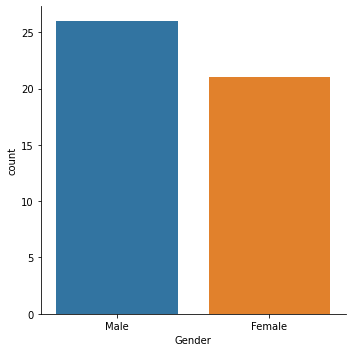

In [ ]:
# Countplot
sns.catplot(x ="Gender",
kind ="count", data = treasure_hunt)

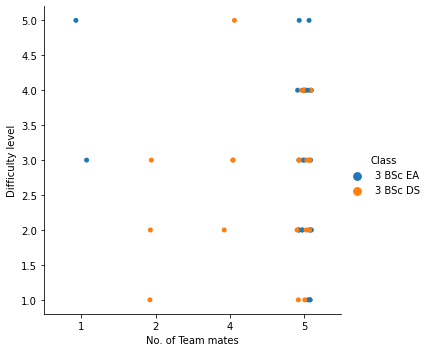

In [ ]:

g = sns.catplot(x='No. of Team mates', y="Difficulty level",
				hue="Class",
				data=treasure_hunt)

In [ ]:
treasure_hunt.columns
treasure_hunt.reset_index().columns

Index(['level_0', 'index', 'Name', 'Class', 'Registration Number', 'Gender',
       'Communication', 'Final Position', 'Rate event', 'Difficulty level',
       'First round(rate)', 'Known Team mates', 'No. of Team mates',
       'No. of team mates speaking same language as yours',
       '1BSc EA(no. of team mates)', '1BSc DS(no. of team mates)',
       '3BSc EA(no. of team mates)', '3BSc DS(no. of team mates)',
       '5BSc EA(no. of team mates)', '5BSc DS(no. of team mates)',
       'MSc (no. of team mates)'],
      dtype='object')

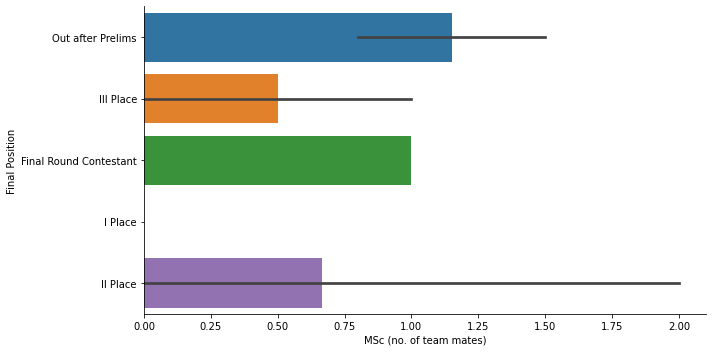

In [ ]:
treasure_hunt.astype({'MSc (no. of team mates)':'int'}).dtypes

g = sns.catplot(y="Final Position",
                x="MSc (no. of team mates)",
                kind="bar",
                data=treasure_hunt,aspect=2)



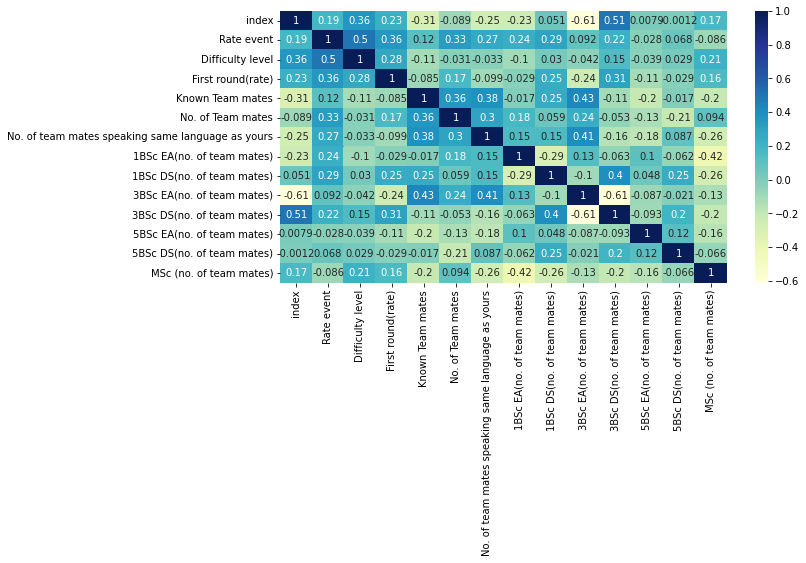

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(treasure_hunt.corr("pearson"),annot = True,cmap="YlGnBu")

plt.show()

In [ ]:
import plotly.io as pio

aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'scatter',
  x = treasure_hunt['Final Position'],
  y = treasure_hunt['Difficulty level'],
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = treasure_hunt['Final Position'],
    aggregations = [dict(
        target = 'y', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Plotly Aggregations</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Subject'),
  yaxis = dict(title = 'Score', range = [0,22]),
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [ ]:
treasure_hunt.reset_index(inplace = True)


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(treasure_hunt)
profile